In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score


data = pd.read_csv("water_potability.csv")
data = data.reset_index()
data = data.drop(columns=["index"])

In [2]:
data.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [3]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [4]:
(data.isnull().sum() / len(data)) * 100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [5]:
data["ph"] = data["ph"].fillna(data["ph"].mean())
data["Sulfate"] = data["Sulfate"].fillna(data["Sulfate"].mean())
data["Trihalomethanes"] = data["Trihalomethanes"].fillna(data["Trihalomethanes"].mean())

In [6]:
data.groupby("Potability").mean()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.084658,196.733292,21777.490788,7.092175,334.371700,426.730454,14.364335,66.308522,3.965800
1,7.074754,195.800744,22383.991018,7.169338,332.844122,425.383800,14.160893,66.533513,3.968328


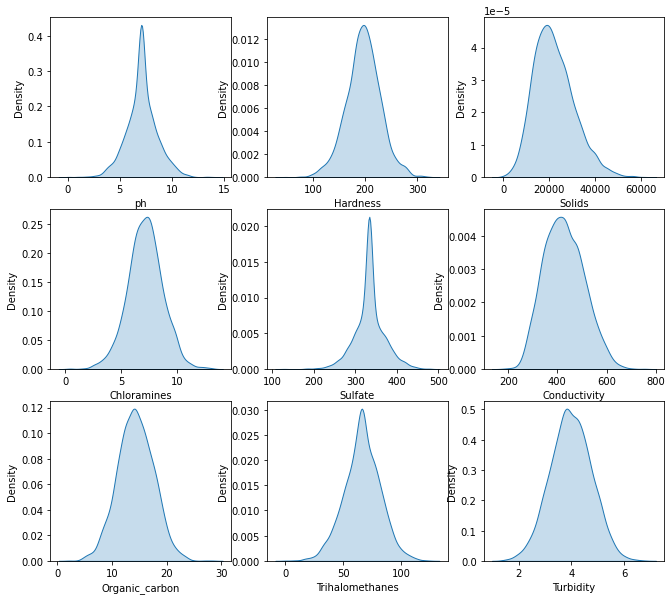

In [7]:
f, axs = plt.subplots(3, 3, figsize=(11, 10))
i = 0
j = 0
for column in data.columns[:9]:
    sns.kdeplot(ax=axs[i,j], data=data[column],shade=True)

    j += 1
    if j == 3:
        j = 0
        i += 1


<AxesSubplot:>

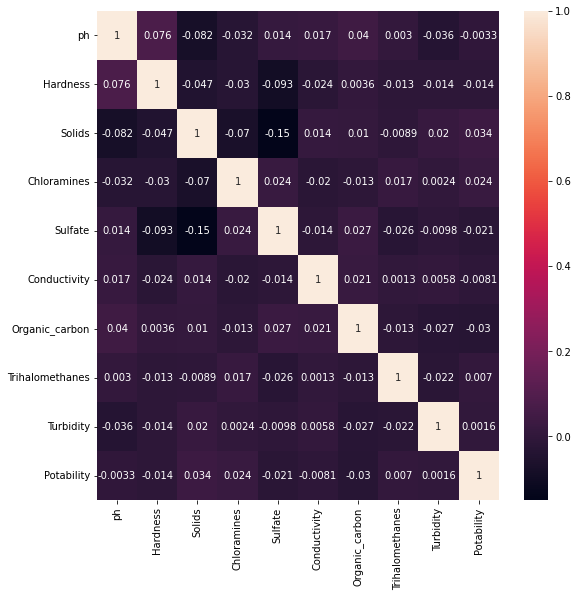

In [8]:
plt.figure(figsize=(9, 9))
sns.heatmap(data.corr(), annot=True, )

In [9]:

dataX = data.loc[:, :"Turbidity"]
dataY = data["Potability"]
result = mutual_info_classif(dataX, dataY)
res_series = pd.Series(result, name="MI Score", index=dataX.columns)
res_series.sort_values(ascending=False)

Hardness           0.026560
Sulfate            0.009673
Conductivity       0.007077
Organic_carbon     0.004014
Turbidity          0.003075
Solids             0.001066
ph                 0.000000
Chloramines        0.000000
Trihalomethanes    0.000000
Name: MI Score, dtype: float64

In [10]:
X = data.drop(columns=["Potability"])
Y = data["Potability"]
scaler = StandardScaler()
X = scaler.fit_transform(X)

xtrain, xtest, ytrain,  ytest = train_test_split(X, Y, test_size=0.33, random_state=42)

In [11]:
log_reg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20).fit(xtrain, ytrain)

In [12]:
log_result = log_reg.predict(xtest)

In [13]:
accuracy_score(ytest, log_result)

0.6284658040665434

In [14]:
round(log_reg.score(xtrain, ytrain), 4)

0.6012

In [15]:
round(log_reg.score(xtest, ytest), 4)

0.6285